# 1. 介绍
对于这个项目，我们被要求选择一个数据集，并使用数据回答我们选择的问题。 我选择了泰坦尼克号的数据集，查看泰坦尼克号上的乘客样本的特征，包括他们是否存活，性别，年龄，兄弟姐妹/配偶，父母和孩子，票价（票价），登船港口等。

查看数据集的内容后，我对下列的问题有疑问：
     
        * 乘客的个人统计是否影响了他们的幸存存可能性？ 
              
              影响的因数：
                - 年龄
                - 儿童或成人
                - 性别
                
        * 乘客乘坐所在的甲板及舱位（1类舱位、2类舱位、3类舱位）否影响了他们的幸存存可能性？ 
        
              影响的因数：
                - 舱位类别 （乘客在Titanic的区域）
                - 乘客具体的位置
               
        * 乘客的目的地是哪里？ 其舱位或者其所在的区域与大多数乘客的目的地有什么关系？
        
                影响的因数：
                - 乘客的目的地
                - 乘客具体的位置
                - 舱位类别 （乘客在Titanic的区域）
                
         * 乘客是否有家庭？这个因素是否影响他们的幸存?
         
                影响的因数：
                - 是否有兄弟、姐妹？               
                - 是否有父母？
              
    

# 2. 建立报告
为了便于对数据进行分析和汇总，使用ipython notebook.  这里将会使用numpy, pandas, matplotlib.pyplot 和 seaborn python的几个模块。下面将会导入这些模块。

In [2]:
# 为这个项目导入需要的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

#导入数据文件
dTitanic_DF = pd.read_csv('titanic-data.csv')

#去掉统计分析无关的列
dTitanic_DF = dTitanic_DF.drop(["Name", "Ticket"], axis = 1)

# 导入附加的可视化代码visuals.py
#import visuals as vs


## 2.1数据的清洗（删除两列-“Name”、“Ticket"）

删除“Name"和”Ticket"两列对于乘客的幸存的预估和分析并不会产生影响。

"Name" 这一列只是对研究个别乘客的相关问题有价值，对于这次讨论的幸存能性并没有任何帮助。

“Ticket" 这一列提供的信息只能作为参考。



# 3.乘客的分布

## 3.1乘客的数据情况汇总

检查完这次报告的数据文件，其内容并不很完整。必须要考虑到最后得出的结果不能掺杂这些不完整的数据(NaN)

大致情况如下：
    - 舱位的信息有204条（完整的信息应该是819条）
    - 年龄的信息有714条（完整的信息应该是819条）
    - 登船的信息有889条（完整的信息应该是819条）
    

In [3]:
# 数据概况
dTitanic_DF.info()
dTitanic_DF.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 3.2乘客性别的概率分布情况

乘客性别的分布是一个很重要的考虑因素。一般认定是，海事的紧急情况处理有女士和小孩优先的法则。就是如果有沉船事件的发生，女士和小孩优先上救生船，女士和小孩优先救护到安全地点。因此男生应该是多数的遇难者。


In [4]:
#先看一下Titanic上男女生的比例是多少
menData = dTitanic_DF[dTitanic_DF.Sex == 'male']
womenData = dTitanic_DF[dTitanic_DF.Sex == 'female']

### 3.2.1数据结构：铁达尼号的数据以性别来分类，分为男生的数据和女生的数据

从铁达尼号的数据中提取相应的数据，男生的数据和女生的数据分别对待，建立相应的数据结构。

以性别对数据进行归类和整理，就可以更深入地对男生和女生的数据进行挖掘。对于相应的数据，可以继续对其年龄提取数据，根据提取的数据判断该乘客是小孩或者是其从此次沉船事件中幸存。


### 3.2.2性别分布情况


Males: 
577

Females: 
314


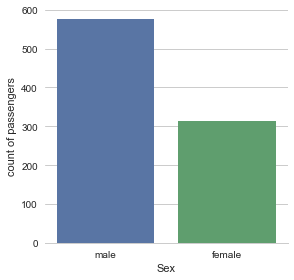

In [5]:
#显示男生和女生的人数
print("Males: ")
print(menData.count()['Sex'])

print ("")
print ("Females: ")
print (womenData.count()['Sex'])

#数据图形化
gSSC = sns.factorplot('Sex', data=dTitanic_DF, kind='count')
gSSC.despine(left=True)
gSSC.set_ylabels("count of passengers")

根据上面的图表，可以看出，男生的数量比女生的数量多的多

### 3.2.3对性别的分布进行分类

深入挖掘，还应该考虑性别在每个Pclass上的分布情况。Pclass是一种根据乘客社会地位进行划分的级别，通过这个级别就可以看出在3种不同的社会经济级别中任何一种级别的性别分布情况

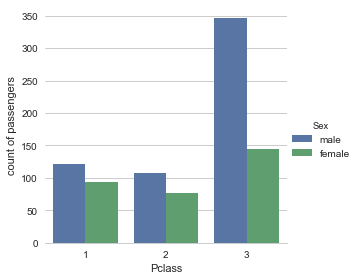

In [6]:
gGCSC = sns.factorplot('Pclass', order = [1,2,3], data = dTitanic_DF, hue='Sex', kind = 'count')

gGCSC.despine(left = True)
gGCSC.set_ylabels("count of passengers")

观察上面的数据，大部分的男生是在3等的Pclass, 女生则是平均地分布在3个级别

## 3.3乘客年龄的分布

除了考虑性别的因素外，还要看一下年龄。沉船逃生的时候，小孩也是优先登上救生船的。第一步，看一下乘客的年龄是怎样分布的。

In [7]:
## 年轻的乘客
print ("Yongest Passenger: ")
youngestPassenger = dTitanic_DF['Age'].min()
print (youngestPassenger)

print("")

#年老的乘客
print ("Oldest Passenger: ")
oldestPassenger = dTitanic_DF['Age'].max()
print (oldestPassenger)

print ("")

#乘客的平均年龄
print ("Average Age of Passengers: ")
avgPassenger = dTitanic_DF['Age'].mean()
print (avgPassenger)

Yongest Passenger: 
0.42

Oldest Passenger: 
80.0

Average Age of Passengers: 
29.6991176471


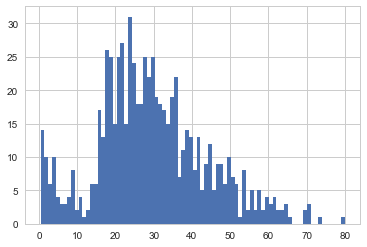

In [8]:
#乘客年龄的分布可视化
dTitanic_DF['Age'].hist(bins = 80)

根据上面的数据显示的柱状图可知，乘客的年龄主要是20到35岁，这个结论是对刚计算出的平均年龄29.69岁给予了有力的支持。

### 3.3.1对年龄的分布进行分类

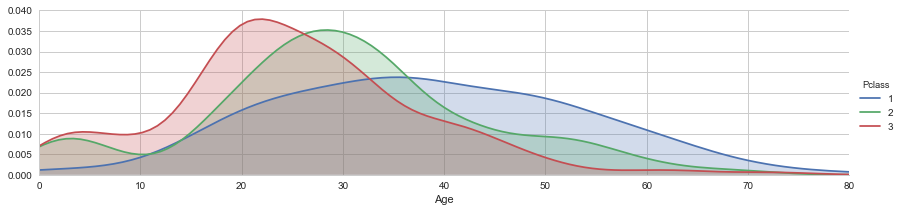

In [9]:
gCPS = sns.FacetGrid(dTitanic_DF, hue = 'Pclass', aspect = 4 , hue_order = [1,2,3])
gCPS.map(sns.kdeplot, 'Age', shade = True)

gCPS.set(xlim=(0,oldestPassenger))
gCPS.set(ylim=(0,0.04))

gCPS.add_legend()

#### 3.3.1.1成人和小孩（小孩< 21岁）

Source: http://www.jstor.org/stable/844549?seq=1#page_scan_tab_contents
    
    
> A Child is Regarded, in common parlance, as a person under the age of twenty-one years.  In the eyes of the common law, all persons were esteemed infants until they attained this age.

--Co. Litt. 78.b; BACON ABRIDGEMENT(1832), vol.  4, Infancey and Age, A.

如果要获得铁达尼号乘客年龄分布的细节，就要考虑乘客中有多少小孩和成人。因为最后成人的女生和小孩会优先登上救生船，这些人的幸存机会比较高。根据当时铁达尼号沉船时的法律，小于21岁的乘客被视为“婴儿”或者是小孩。

In [10]:
# 乘客分成三类：成人分成男生和女生；小于21岁的视为小孩

def minorOrAdult(passenger):
    age, sex = passenger
    
    if age < 21:
        return 'child'
    else:
        return sex
    
# 数据集增加新的一列,标示出乘客的年龄分类（小孩、男生和女生）
dTitanic_DF['PersonStatus'] = dTitanic_DF[['Age','Sex']].apply(minorOrAdult, axis = 1)

### 3.3.2数据整理：增加PersonStatus列并使用函数minorOrAdult

建立函数minorOrAdult, 使用此函数对乘客进行分类。为了避免替换数据集的数据，另外增加一列“PersonStatus"来标识乘客的分类。
乘客分成三类：成人分成男生和女生；小于21岁的视为小孩。

In [11]:
# value_counts() 用来计算每一类乘客的数量
dTitanic_DF['PersonStatus'].value_counts()

male      474
female    237
child     180
Name: PersonStatus, dtype: int64

上面的数据显示了乘客分类后，每一组乘客的人数。这样就可以很容易对幸存率高的数据进行分析（女生和小孩优先登上救生船）

### 3.3.3乘客中女生和小孩的分布

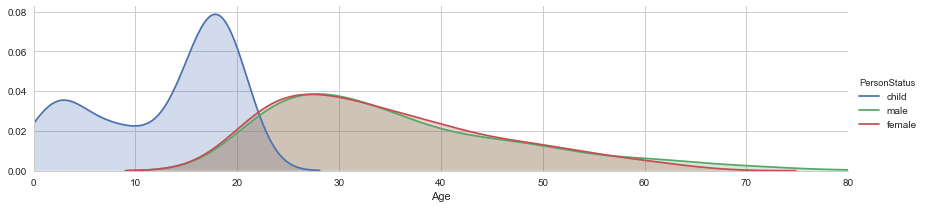

In [12]:
gACPS = sns.FacetGrid(dTitanic_DF, hue = 'PersonStatus', aspect = 4, hue_order=['child', 'male', 'female'])
gACPS.map(sns.kdeplot, 'Age', shade = True)


gACPS.set(xlim=(0, oldestPassenger))
gACPS.add_legend()

上面的数据图显示，成人的乘客中，男生和女生分布基本一致。小孩的曲线分两段，第一段是初生儿到10岁，第二段是10岁到21岁。

### 3.3.4小孩和成人的分类分布

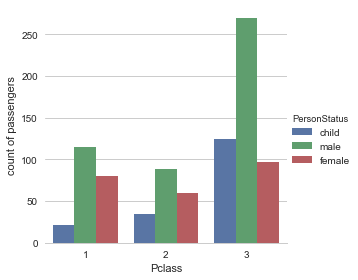

In [13]:
gGAC = sns.factorplot('Pclass', order=[1,2,3], data = dTitanic_DF, hue = 'PersonStatus', kind = 'count', hue_order = ['child', 'male', 'female'])

gGAC.despine(left = True)
gGAC.set_ylabels("count of passengers")

上面的数据图显示出每个分类里小孩和成人（男生、女生）的分布，这个分布也把乘客的社会经济阶层区分出来。Pclass 3的乘客占大多数，这个阶层的乘客是社会经济阶层里最低的，因此人数最多。
男生的人数是每个阶层的主要组成部分，女生的人数则是相对均匀地分布在每个阶层。小孩的人数在Pclass 3的人数是最多的。

## 3.4从舱位来看乘客的分布

### 3.4.1数据清洗：把舱位无效的数据用函数dropna处理并把处理后的数据放置在deckLOC并建立TitanicCab_DF数据集

目前舱位的数据总共是891条，实际有效的数据是204条。因此要把无效的数据剔除后，才能计算出实际使用的舱位。为了保证原数据的完整性，因此处理后的数据放置在deckLOC数据集中。（DeckLOC Cabin Column）的第一个字母加载deckLevels然后放置在TitanicCab_DF数据集。

In [39]:
# 处理无效的数据
deckLOC = dTitanic_DF['Cabin'].dropna()

deckLevels = []
for level in deckLOC:
 deckLevels.append(level[0])
TitanicCab_DF = pd.DataFrame(deckLevels)
TitanicCab_DF.columns = ['Cabin']

### 3.4.2舱位类别的乘客分布

乘客乘坐在不同的甲板和舱位分别用字母A到G表示。891个乘客中有204个乘客有实际的舱位记录，通过有限的记录分布可以看一下舱位的分布对乘客幸存的机会有多大的影响。

**source:**  http://www.scmp.com/infographics/article/1633333/infographic-titanic


![GitHud](titanic.jpg)

通过上面的分解图可以看出：一等和二等舱的乘客主要位于A,B,C,D,E甲板，比较低级的乘客位于F和G甲板。

### 3.4.3数据清洗：去除TitanicCab_DF数据集中，舱位栏中带“T”的数据

**source:** http://www.encyclopedia-titanica.org/cabins.html

带“T”的舱位是头等舱，是一个名叫Mr Stephen Weart的乘客

In [15]:
#去除带“T”的数据
TitanicCab_DF = TitanicCab_DF[TitanicCab_DF.Cabin != 'T']

由于“T”的数据只是代表头等舱的一位乘客，去除其数据后，下面的乘客图表中将不显示此乘客的信息

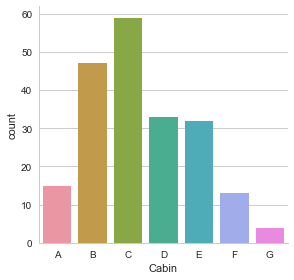

In [16]:
sns.factorplot('Cabin', order = ['A','B','C','D','E','F','G'], data = TitanicCab_DF, kind = 'count')

上面的图表显示，204为乘客中甲板B、C的乘客占了大多数。B、C的乘客多数是富豪或者是头等舱的乘客。 甲板D、E的乘客分布相对甲板B、C来说是比较中等的人数，D和E的乘客一般是一等和二等舱的乘客。 A、F和G的乘客人数就比较少了。甲板A的乘客一般是船上的工作人员，F和G的乘客是等级比较低的乘客。

## 3.5关于下船地点的乘客分布

下船地点与乘客的社会经济阶层有着密切的关系，通过下船的地点就可以看出乘客的社会阶层

### 3.5.1下船地点的乘客分布及其舱位等级

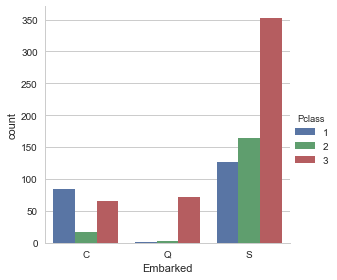

In [17]:
sns.factorplot('Embarked', order=['C','Q','S'], data=dTitanic_DF, hue='Pclass', kind='count', hue_order=[1,2,3])

上面图表的C、Q和S分别是Cherbourg、Queenstown和Southampton。大多数的乘客是来自于Southampton,仔细研究这些乘客的数据，大部分的乘客是3等舱的。另外，2等舱的乘客比1等舱的乘客要多一些。来自Queenstown的乘客，主要是3等舱的，其他的基本没有。来自Cherbourg的乘客，1等舱和3等舱的乘客大致持平。

### 3.5.2家庭乘客和单身乘客的分布

与家人一起旅行的家庭乘客和单身的乘客在灾难来临的时候，只是考虑自己还是愿意与其他人同舟共济。




### 3.5.3数据整理：增加"Solo_or_Family"这一列

原数据集已经有两列数据显示乘客是单身还是家庭，但是不直观。这两列分别是SibSP(Siblings on board)和Parch(Parent or Children on board)。如果乘客在SibSP和Parch这两列等于“0”，那么“Alone"就会设置成该乘客的”Solo or Family"这一列的值，大于“0”的就设置成“Family"。


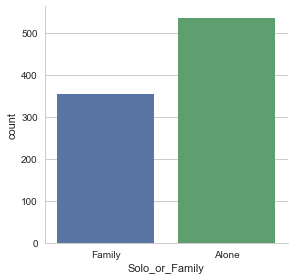

In [19]:
# 使用SibSP - Siblings on board,Parch - Parent or children on
dTitanic_DF['Solo_or_Family'] = dTitanic_DF.SibSp + dTitanic_DF.Parch

#print dTitanic_DF[Solo_or_Family]
dTitanic_DF['Solo_or_Family'].loc[dTitanic_DF['Solo_or_Family'] > 0] = 'Family'
dTitanic_DF['Solo_or_Family'].loc[dTitanic_DF['Solo_or_Family'] == 0] = 'Alone'

#dTitanic_DF.loc[:,dTitanic_DF.loc['Solo or Family'] > 0] = 'Family'
#dTitanic_DF.loc[:,dTitanic_DF.loc['Solo or Family'] == 0] = 'Alone'

sns.factorplot('Solo_or_Family', data=dTitanic_DF, kind='count')

上面的数据显示，单身的乘客比家庭乘客的数量多得多

# 4.幸存率的计算 - 年龄、性别、舱位等级、单身乘客和家庭乘客

经过上面一系列的计算，可以开始计算乘客的幸存概率

## 4.1幸存乘客和遇难乘客的比较

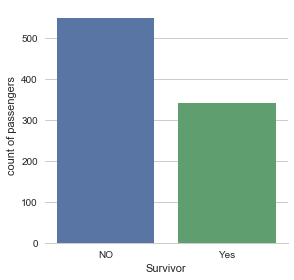

In [20]:
#幸存乘客
dTitanic_DF['Survivor'] = dTitanic_DF.Survived.map({0:'NO', 1:'Yes'})

gSOA = sns.factorplot('Survivor', data = dTitanic_DF, kind = 'count')
gSOA.despine(left = True)
gSOA.set_ylabels("count of passengers")

根据上面的计算，很大一部分的乘客都遇难了。

## 4.2幸存者的性别概率

Men Survivalbiliy: 
0.188908145581
Women Survivalbiliy: 
0.742038216561


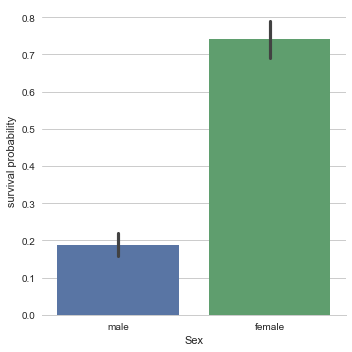

In [21]:
menProb = menData.groupby('Sex').Survived.mean()
womenProb = womenData.groupby('Sex').Survived.mean()

menPercent = menProb[0]*100
womenPercent = womenProb[0]*100

print("Men Survivalbiliy: ")
print(menProb[0])

print("Women Survivalbiliy: ")
print(womenProb[0])

gSSP = sns.factorplot("Sex", "Survived", data = dTitanic_DF, kind = "bar", size = 5)
gSSP.despine(left = True)
gSSP.set_ylabels("survival probability")

男生和女生的幸存率有很大的差别，女生的幸存率是74%，男生的幸存率仅为19%

## 4.3幸存者的舱位等级

class 1 Survivality: 
0.62962962963
Class 2 Survivality: 
0.472826086957
Class 3 Survivality: 
0.242362525458


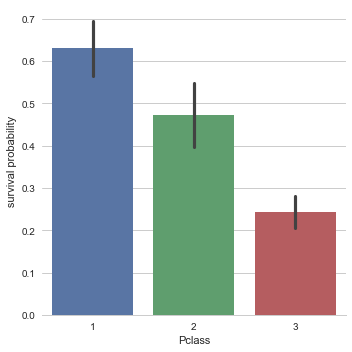

In [22]:
#幸存者的舱位等级

def define_pClassProb(dataFrameIN, numClass):
    classEntries = dataFrameIN[dataFrameIN.Pclass == numClass]
    sClassEntries = classEntries[classEntries.Survived == 1]
    
    cClassEntries = (classEntries.count(numeric_only = True)['Pclass']).astype(float)
    sClassEntries = (sClassEntries.count(numeric_only = True)['Pclass']).astype(float)
    
    return(sClassEntries/cClassEntries)

print ("class 1 Survivality: ")
print (define_pClassProb(dTitanic_DF, 1))

print ("Class 2 Survivality: ")
print (define_pClassProb(dTitanic_DF, 2))

print ("Class 3 Survivality: ")
print (define_pClassProb(dTitanic_DF, 3))

gCS = sns.factorplot("Pclass", "Survived", order = [1,2,3], data = dTitanic_DF, kind = "bar", size = 5)
gCS.despine(left = True)
gCS.set_ylabels("survival probability")

Class 1 Survivality: 
0.62962962963
Class 2 Survivality: 
0.472826086957
Class 3 Survivality: 
0.242362525458


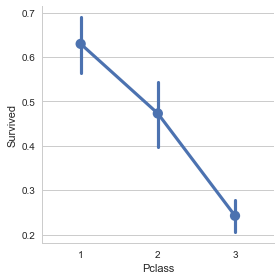

In [23]:
print("Class 1 Survivality: ")
print(define_pClassProb(dTitanic_DF, 1))

print("Class 2 Survivality: ")
print(define_pClassProb(dTitanic_DF, 2))

print("Class 3 Survivality: ")
print(define_pClassProb(dTitanic_DF, 3))

sns.factorplot("Pclass", "Survived", order = [1,2,3], data = dTitanic_DF, kind = 'point')


根据上面的柱状图及计算的结果，可以看出1等舱位的乘客幸存率为63%，是三种舱位中最高的。2等舱的幸存率是47%，3等舱的幸存率仅为24%，是最底的。

   ## 4.4幸存者舱位等级及性别的概率
   
   现在来看一下，乘客舱位等级和性别对幸存的概率有多大的影响，看一下同一性别下的舱位等级的幸存概率是怎样的。
   
       

Class 1 Survivality(MALE): 
0.368852459016
Class 1 Survivality(FEMALE): 
0.968085106383
Class 2 Survivality(MALE): 
0.157407407407
Class 2 Survivality(FEMALE): 
0.921052631579
Class 3 Survivality(MALE): 
0.135446685879
Class 3 Survivality(FEMALE): 
0.5


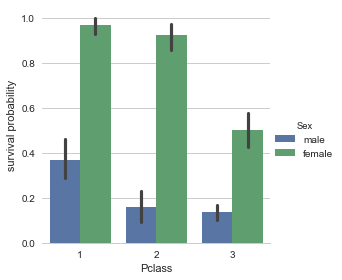

In [24]:
#同一性别下的舱位等级的幸存概率
def define_pClassProbSex(dataFrameIN, numClass, sex): 
    classEntries = dataFrameIN[(dataFrameIN.Pclass == numClass)&(dTitanic_DF.Sex == sex)]
    sClassEntries = classEntries[classEntries.Survived == 1]
    
    
    cClassEntries = (classEntries.count(numeric_only = True)['Pclass']).astype(float)
    cSClassEntries = (sClassEntries.count(numeric_only = True)['Pclass']).astype(float)
    
    return (cSClassEntries/cClassEntries)

print("Class 1 Survivality(MALE): ")
print(define_pClassProbSex(dTitanic_DF, 1, 'male'))

print("Class 1 Survivality(FEMALE): ")
print(define_pClassProbSex(dTitanic_DF, 1, 'female'))

print("Class 2 Survivality(MALE): ")
print(define_pClassProbSex(dTitanic_DF, 2, 'male'))

print("Class 2 Survivality(FEMALE): ")
print(define_pClassProbSex(dTitanic_DF, 2, 'female'))

print("Class 3 Survivality(MALE): ")
print(define_pClassProbSex(dTitanic_DF, 3, 'male'))

print("Class 3 Survivality(FEMALE): ")
print(define_pClassProbSex(dTitanic_DF, 3, 'female'))

gGCSP = sns.factorplot("Pclass","Survived", order = [1,2,3], data = dTitanic_DF, hue = 'Sex', kind = 'bar')

gGCSP.despine(left = True)
gGCSP.set_ylabels("survival probability")


根据上面的柱状图显示，1等舱的女生幸存率几乎是100%，男生的幸存率为37%。2等舱的女生幸存率为92%，男生则是16%。3等舱的女生幸存率为60%， 男生则是13%。

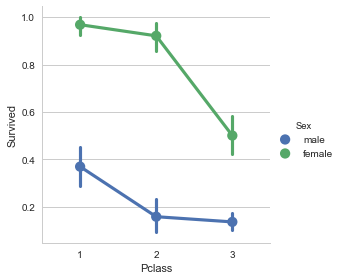

In [25]:
sns.factorplot("Pclass", "Survived", hue = 'Sex', order = [1,2,3], data = dTitanic_DF, kind = 'point')

通过上面的点图可知，乘客关于性别在不同的舱位等级对于其幸存率有明显的不同。就1等舱和2等舱的女生而言，其幸存率的差异不大，但是到了3等舱就有显著的下降。就男生而言，各个等级的舱位的幸存率都是偏低的，这是因为女生和小孩优先登上救生船获救。出人意表的是1等舱的男生幸存率与3等舱女生幸存率大致相当。

## 4.5幸存者的舱位与其是否大于21岁的概率

根据上面的结果，可以知道性别在不同的舱位等级有着很明显的不同，尤其是1等舱的乘客。因此对于幸存者的分组在细分一下：男生、女生和小孩（任何小于21岁的乘客，不分性别）

PClass 1 Survival Child: 
0.809523809524
PClass 2 Survival Child: 
0.742857142857
PClass 3 Survival Child: 
0.314516129032


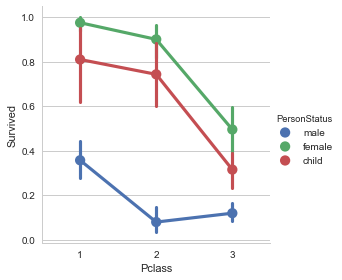

In [26]:
#不同等级的舱位下，小孩的幸存率
def define_pClassChildProb(dataFrameIN, numClass):
    
    ChildDF = dataFrameIN[(dataFrameIN.Pclass == numClass)&(dataFrameIN.PersonStatus == 'child')]
    ChildSurvived = dataFrameIN[(dataFrameIN.Pclass == numClass)&(dataFrameIN.PersonStatus == 'child')&(dataFrameIN.Survivor == 'Yes')]
    
    totalCChild = ChildDF.count()['PassengerId'].astype(float)
    CChildSurvived = ChildSurvived.count()['PassengerId'].astype(float)
    
    return CChildSurvived/totalCChild
    
print ("PClass 1 Survival Child: ")
print (define_pClassChildProb(dTitanic_DF, 1))

print ("PClass 2 Survival Child: ")
print (define_pClassChildProb(dTitanic_DF, 2))

print ("PClass 3 Survival Child: ")
print (define_pClassChildProb(dTitanic_DF, 3))

sns.factorplot("Pclass", "Survived", hue='PersonStatus', order = [1,2,3], data = dTitanic_DF, kind = 'point')

从上面的结果可以看出，小孩的幸存与女生的幸存率大致相当。这是因为女生和小孩优先登上救生船获救得缘故。

## 4.6从年龄看幸存的概率


 [<matplotlib.text.Text at 0x10a4cd68>, <matplotlib.text.Text at 0x10a34470>],

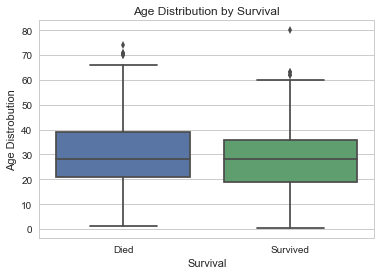

In [27]:
#sns.lmplot('Age', 'Survived', data=dTitanic_DF)
pSBA = sns.boxplot(data=dTitanic_DF, x='Survived', y='Age')
pSBA.set(title='Age Distribution by Survival',
xlabel = 'Survival',
ylabel = 'Age Distrobution',
xticklabels = ['Died', 'Survived'])

通过上面的箱形图可以看出，两者的平均值大致相等。关于Died的平均值要比Survived的平均值要高一些。

## 4.7从年龄看舱位等级和生存

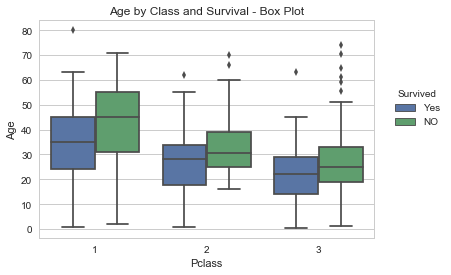

In [28]:
#sns.lmplot('Age', 'Survived',hue='Pclass', data=dTitanic_DF, hue_order=[1,2,3])
pACSB = sns.boxplot(data = dTitanic_DF.dropna(subset = ['Age']).sort_values('Pclass'), x='Pclass', y='Age', hue='Survivor')
pACSB.set(title='Age by Class and Survival - Box Plot', xlabel='Pclass')
pACSB.legend(bbox_to_anchor=(1.05, .7), loc=2, title = 'Survived',borderaxespad=0.)

通过比对每个等级的舱位的生存情况，年轻的乘客更容易生存，年纪较大的乘客比较容易遇难。

## 4.8从年龄看性别和生存

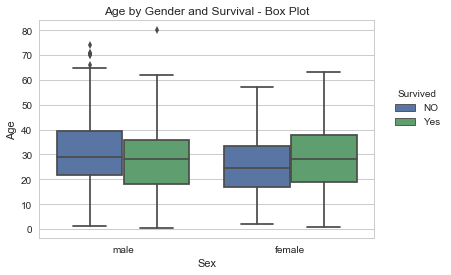

In [29]:
#sns.lmplot('Age', 'Survived', hue='Sex' ,data=dTitanic_DF)
pAGSB = sns.boxplot(data=dTitanic_DF.dropna(subset = ['Age']), x= 'Sex', y= 'Age', hue='Survivor')
pAGSB.set(title='Age by Gender and Survival - Box Plot')
pAGSB.legend(bbox_to_anchor=(1.05, .7), loc=2, title = 'Survived',borderaxespad=0.)

通过上面的比较可以看出，年轻男生的生存机会比年纪大的要大，女生则是相反，年纪大的生存机会反而大。

## 4.9基于单身和家庭的乘客幸存的概率

Probability of Survival being with Family: 
0.505649717514

Probability of Survival being alone: 
0.303538175047


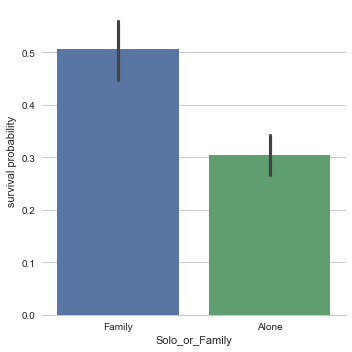

In [34]:
familyPass = dTitanic_DF[dTitanic_DF['Solo_or_Family'] == "Family"]
alonePass = dTitanic_DF[dTitanic_DF['Solo_or_Family'] == "Alone"]
# 建立单身乘客和家庭乘客的列表
AFamilyPass = familyPass[familyPass.Survivor == "Yes"]
AAlonePass = alonePass[alonePass.Survivor == "Yes"]

#计算概率
pAF = float(AFamilyPass['Solo_or_Family'].count()) / float(familyPass['Solo_or_Family'].count())
pAA = float(AAlonePass['Solo_or_Family'].count()) / float(alonePass['Solo_or_Family'].count())
print("Probability of Survival being with Family: ")
print(pAF)
print("")
print("Probability of Survival being alone: ")
print(pAA)
gSSP = sns.factorplot("Solo_or_Family", "Survived", data=dTitanic_DF, kind="bar", size=5)
gSSP.despine(left=True)
gSSP.set_ylabels("survival probability")

上面的图表显示，家庭乘客的幸存率是50%，单身乘客的幸存率是30%

# 5. 总结

在查看乘客数据时，我们可以看到我们可以根据年龄将其划分为特定的组（小孩和成人年龄组），性别，下船城市，舱位等级等分类。 当把乘客分成这些小组时，我们可以根据每个组的统计数字和乘客匹配的组合，调查乘客幸存的情况。'<从年龄看性别和生存>'

## 5.1数据清洗/整理汇总

* [2.1数据的清洗（删除两列-“Name”、“Ticket"）](#2.1数据的清洗（删除两列-“Name”、“Ticket"）)

* [3.2.1数据结构：铁达尼号的数据以性别来分类，分为男生的数据和女生的数据](#3.2.1数据结构：铁达尼号的数据以性别来分类，分为男生的数据和女生的数据)
    
* [3.3.2数据整理： 增加PersonStatus列并使用函数minorOrAdult](#3.3.2数据整理：增加PersonStatus列并使用函数minorOrAdult)

* [3.4.1数据清洗： 把舱位无效的数据用函数dropna处理并把处理后的数据放置在deckLOC并建立TitanicCab_DF数据集](#3.4.1数据清洗：把舱位无效的数据用函数dropna处理并把处理后的数据放置在deckLOC并建立TitanicCab_DF数据集)

* [3.4.3数据清洗：去除 TitanicCab_DF数据集中，舱位栏中带“T”的数据](#3.4.3数据清洗：去除TitanicCab_DF数据集中，舱位栏中带“T”的数据)

* [3.5.3数据整理：增加"Solo or Family"这一列](#3.5.3数据整理：增加"Solo_or_Family"这一列)

## 5.2分析的限制

由于大多数观察结果都是由所提供的数据集来判断的，所以我们在理解关于该事件的所有事情方面仍存在很大的差距，并且有可能关注所提供的内容并且忘记了可能存在其他数据集未涵盖的因素也可能影响事件发生的原因。仔细观察后，将尝试检查哪些带有限制条件的结论需要被重新考虑。

### 5.2.1数据集的无效数据（乘客的信息并不完整，有些栏位的信息是缺失的）

从一开始得到的数据集，其信息就不是很完整。例如年龄就只有714条信息，舱位的信息就只有204条，登船信息只有889条。乘客的总人数是891人。这种信息的缺少会对一些特定的栏位的分析和计算带来影响，如产生的曲线因为信息量不够导致其生成的曲线不是太平滑。

根据“舱位”（“Cabin”）这个栏位，可以观察一下[“3.4.2舱位类别的乘客分布”](#3.4.2舱位类别的乘客分布)的图表，204条信息里记录了甲板B,C,D,E的乘客，这些乘客分布在1等、2等舱。根据这些信息，深入地研究1等舱和2等舱的乘客，生成更加精确的图表[“3.2.3对性别的分布进行分类”](#3.2.3对性别的分布进行分类)。从图表中可以看出有许多3等舱的乘客的信息在图中是缺失的。

对“年龄”（“Age”)这个栏位，891位乘客里，我们只有714条信息，还差177条信息才算完整。观察[”3.3乘客年龄的分布“](#3.3乘客年龄的分布)里的柱状图，横坐标分成80bins。如果加入这177条信息，一定会对其图形产生影响，甚至也会影响幸存率的计算。因为不管这177条信息里包含的年龄是年轻的还是年老的，从计算平均值方面去考虑，对于数据集的最大值和最小值都会被改变。

关于“登船”（“Embarked”）的这个栏位，891乘客里，提供了889条信息。由于其差异只有不到1%，因此该栏位的信息缺失不会对其数据造成很大的影响，但是也要注意。

### 5.2.2此次的分析仅限于数据统计的分析，没有对其统计数据进行测试
这个分析是用统计计算完成的，而不是统计测试。这个项目中的许多选项只能被视为趋势观察和相关性观察。还有一点要考虑的是，在这个项目中没有一个明确的零假设，这个假设是幸存概率是本项目的一个主要重点。 这个项目并没有反驳一个特定的生存立场，只是观察不同数据点（年龄，性别，社会经济阶层）之间的相关性。

统计测试的好处在于，我们可以深入研究数据中某个特定的数据点，比如乘客的性别和生存能力，因为这些数据是最多的（保留891名乘客的所有记录）。从这个给定的数据集辩论数据不足的话题是不太可能的。还要指出一个更重要的注意事项是可以假设是特别的统计测试，在数据集的各个方面之间建立一个更清晰、更重要的统计关系，涉及一个明确的拒绝或接受的零假设的置信百分比。

分析一下幸存率，看一下它与性别是否是具有独立性还是不具有独立性。这部分的分析位于下面的“建议/验证-统计测试验证调查结果（性别和幸存率）”，此部分是使用方差对独立性进行测试。

### 5.2.3缺少可能影响分析的可能因素

需要考虑的另一点是，数据集侧重于乘客的基本方面（年龄，性别，舱位位置，社会经济阶层），但是不能将更多的主观方面带入影响乘客生存的因素。虽然我们知道有限的舱位位置，但这并不意味着所有的乘客都在泰坦尼克号撞船的时候，他们在自己的舱位内。即使船撞在冰山上的晚上，也很难假定每个人都会熟睡在他们指定的舱室里。

另外一点是3等舱的女生和小孩就算在女生和小孩优先登上求生船的前提下，与2等舱的妇女和小孩的相比，其死亡率是很高的。这里会不会有其他的原因障碍这些女生和小孩登上救生船呢？会不会有一部分1等舱的男生趁着沉船时的混乱，忽略女生和小孩优先的约定，偷偷地登上救生船获救？

还有一个就是这个铁达尼号本身，这个船的本身在这个逃生安全方面的设计。例如救生船有没有在这个船上的配备和分布是否合理？ 救生船的数量和其载客量在当时是否能满足逃生的要求？


## 5.3乘客统计及其对幸存率的影响

### 5.3.1年龄对幸存率有影响吗？ 

沉船的时候，年龄对幸存率有很大的影响：它可以决定一个乘客在紧急情况下的反应有多快；如果他是属于可以优先登上救生船的或者他的机动性很强，足以让他在沉船的紧急情况下转移到安全的地方。

我们来看一下[4.6从年龄看幸存的概率](#4.6从年龄看幸存的概率)的这张图，幸存的年龄IQR是比较有利于年轻的乘客，就是说年轻的乘客幸存率会高一些。再看一下[4.7从年龄看舱位等级和生存](#4.7从年龄看舱位等级和生存)这张图，每个舱位等级的年龄分布，遇难的乘客IQR比较高，就是遇难乘客的年龄比幸存的乘客年龄要高，这一点和“从年龄看幸存的概率”这张图是吻合的。

上述的两张图都显示，遇难的乘客年龄都偏大，幸存的乘客年龄都比较轻。

### 5.3.2性别对幸存率有影响吗？

性别是另外一个队幸存率有很大影响的因素。发生海难时，女生和小孩可以优先登上救生船获救，男生则要等女生和小孩都上救生船后才能登救生船获救。

查看[4.8从年龄看性别和生存](#4.8从年龄看性别和生存)箱形图，男生部分的幸存机会是年轻的乘客比较高，年龄大的乘客遇难的机会比较高。女生的部分则是相反，年龄大的乘客的幸存机会比较高，年纪轻的乘客则是遇难机会比较高。

当查看[4.2幸存者的性别概率](#4.2幸存者的性别概率)这张图非常显著地表示，男生整体的幸存率仅为19%，女生则是高达74%。

从性别的数据里再深挖，对性别的数据内，再看看其乘客的舱位等级又是怎样分布的。[4.4幸存者舱位等级及性别的概率](#4.4幸存者舱位等级及性别的概率)非常明显的表示，女生的幸存率在每个等级的舱位都远远高于男生。

### 5.3.3小孩对幸存率有影响吗？

小孩因为可以优先登上救生船获救因此预计其幸存率跟女生大致相当。[4.5幸存者的舱位与其是否大于21岁的概率](#4.5幸存者的舱位与其是否大于21岁的概率)这张图可以看出，小孩的在每个等级的舱位的幸存率与女生的走向是一致的，具体的幸存率只是比女生的稍稍低一点。

### 5.3.4小孩和女生优先的约定法则--真的被执行了吗？

这个法则是遇到海难时的第一法则，根据铁达尼号的沉船事件，当小孩和女生登上救生船的时候，这一法则的遵循是还是有局限性的。我们可以参考一下[4.5幸存者的舱位与其是否大于21岁的概率](#4.5幸存者的舱位与其是否大于21岁的概率)这张图。

可以预见到，男生的成年乘客在每一个等级的舱位的幸存率都比女生和小孩要低，观察图表显示的数据，确实如此。但是[3等舱的小孩幸存率为31%（PClass 3 Survival Child）](#4.5幸存者的舱位与其是否大于21岁的概率),这么低的幸存率比[1等舱的男生幸存率37%还要低（Class 1 Survivality(MALE)）](#4.4幸存者舱位等级及性别的概率)

## 5.4舱位等级（乘客在船上位置的统计）对幸存率的影响

1等舱位的男生幸存率比3等舱小孩的幸存率要高，这是明显违反了海难的第一准则“女生和小孩优先”。3等舱的小孩在沉船之前，并不能登上救生船。这也可能与3等舱的大部分乘客的幸存率与1等和2等舱的乘客相比显得很低有关系。（参考[4.5幸存者的舱位与其是否大于21岁的概率](#4.5幸存者的舱位与其是否大于21岁的概率)）

参考[3.4.2舱位类别的乘客分布](#3.4.2舱位类别的乘客分布),我们可以看到大部分的乘客的乘坐位置是位于甲板B到甲板E，这部分乘客主要是1等和2等舱的乘客。对于3等舱的乘客就很多没有记录。891位乘客中，只有204位乘客的记录，其他的都没有。这204位乘客里，大部分是1等和2等舱的，3等舱的就没有了。

## 5.5关于下船地点的乘客分布，他们的舱位等级分布是怎样的

城市里自然就有不同的社会经济阶层，因此下船地点一定会对船上的社会经济阶层的人数有影响。（参考[3.5.1下船地点的乘客分布及其舱位等级](#3.5.1下船地点的乘客分布及其舱位等级)） 

C、Q和S分别是Cherbourg、Queenstown和Southampton, 大部分的乘客来自于Southampton，3等舱的有350人，2等舱的有150人，1等舱的有100人。由此推断Southampton应该是个大城市，船上大部分的乘客都来自这个城市的各个阶层。Queenstown应该是个小地方，只有3等舱的乘客来自于此地。来自于Cherbourg的乘客一般在1等舱和3等舱，由此推断这个地方比较富裕但也有工薪阶层。

铁达尼号上的乘客来自不同的地方，乘客的数量只能代表其来自的这个城市的一小部分，这里的分析只是基于这些有限的数据进行的，一定会存在局限性。另外一方面就是铁达尼号上的工作人员，这里面也有一部分人是为了节省旅游的费用，所以才选择在船上工作。

Cherbourg虽然是个小地方，来自这里的乘客一般比较富有，但是也有一部分乘客选择在船上工作，借此机会享受工作和旅行的乐趣。Queenstown的多数乘客都是3等舱的，也有一部分是在船上工作的。Southampton的乘客占了大多数，1等舱和2等舱的乘客多是在享受旅行的乐趣，也有一部分是3等舱和在船上工作的工作人员。

## 5.6单身旅行和家庭旅行的乘客对幸存率的影响

单身旅行和家庭旅行的乘客是影响幸存率的因素之一，家庭乘客在遇到困难的时候，他们之间可以互相帮助，这是单身旅行的乘客无法做到的。先看一下其数据图[3.5.2家庭乘客和单身乘客的分布](#3.5.2家庭乘客和单身乘客的分布), 从这个图里可以看出，家庭乘客的数量也是相当可观的。891位乘客里，有350位乘客是家庭乘客。

单身旅行和家庭旅行的乘客的幸存率的影响可以看一下[4.9基于单身和家庭的乘客幸存的概率](#4.9基于单身和家庭的乘客幸存的概率),家庭乘客的幸存率有着显著提升，家庭乘客的幸存率是50%，单身乘客的幸存率只有30%。

# 6.建议/验证-统计测试验证调查结果（性别和幸存率）

**Source: **https://en.wikipedia.org/wiki/Chi-squared_test

统计测试是一种验证结果的方法，而不是简单地进行相关性观察。根据性别，对其幸存率通过卡方检验验证其独立性。卡方检验可以应用于来自单个人口的两个分类变量（两个分类变量 - 男生和女生，单个人口 - 铁达尼号的乘客）

根据性别和幸存率之间的独立性，我们可以作出假设：

    零假设：   性别和幸存率之间是独立的
    
    替代假设： 性别和幸存率之间是非独立的
    
在[3.2乘客性别的概率分布情况](#3.2乘客性别的概率分布情况)下的[3.2.2性别分布情况](#3.2.2性别分布情况),可以继续分析：
        结果的格式（总人数，幸存人数，死亡人数）

In [35]:
print("Males: ")
print(menData.count()['Sex'], menData[menData.Survived == 1].count()['Sex'], menData[menData.Survived == 0].count()['Sex'])
print("")
print("Females: ")
print(womenData.count()['Sex'], womenData[womenData.Survived == 1].count()['Sex'], womenData[womenData.Survived == 0].count()['Sex'])
print("")
print("Out of the total Passengers on the Titanic: ")
print(dTitanic_DF.count()['Sex'])

Males: 
(577, 109, 468)

Females: 
(314, 233, 81)

Out of the total Passengers on the Titanic: 
891


上面已经计算出乘客里男生和女生的人数，包括遇难和幸存的人数。接下来就可以使用“Scipy package”计算卡方检验并验证其独立性和决定"p-value"的值。

In [38]:
import scipy as sp

menSurvived = menData[menData.Survived == 1].count()['Sex']
menDied = menData[menData.Survived == 0].count()['Sex
                                                 
womenSurvived = womenData[womenData.Survived == 1].count()['Sex']
womenDied = womenData[womenData.Survived == 0].count()['Sex']
                                                 
# 卡方检验验证性别和幸存率的独立性
men_women_survival = np.array([[menSurvived, menDied],[womenSurvived, womenDied]])
print(men_women_survival)
                                                 
# 卡方的计算
sp.stats.chi2_contingency(men_women_survival)

[[109 468]
 [233  81]]


(260.71702016732104,
 1.1973570627755645e-58,
 1L,
 array([[ 221.47474747,  355.52525253],
        [ 120.52525253,  193.47474747]]))

把上面的数据整理成表格：

 |  |幸存|遇难|
 |---|---|---|
 |男生|109|468|
 |女生|233|81|
 
 最后的结果如下：
 卡方检验的值： 260.71702016732104
 
 p-value的值: 1.1973570627755645e-58
 
 自由度深度的值： 1L
 
 预期的频率：
 
 |  |幸存|遇难|
 |---|---|---|
 |男生|221.47474747|355.52525253|
 |女生|120.525252|193.47474747|
 
p-value的值是1.1973570627755645e-58（因为卡方检验的值是260.71702016732104）<0.00001, P-value的值小于0.05，这表明性别和幸存率之间是有关联的。

根据这么低的P-value,对第一个假设就是零假设就可以否定了。**第二个假设成立，就是说性别和幸存率是非独立的。**

# 7.引用资源

* [Encyclopedia Titanica - "Cabins Information"](http://www.encyclopedia-titanica.org/cabins.html)

* [Wikipedia - "Chi-squared test"](https://en.wikipedia.org/wiki/Chi-squared_test)

* [The South China Morning Post - "Diagram of Titanic"](http://www.scmp.com/infographics/article/1633333/infographic-titanic)

* [The American and English Encyclopedia of Law, Garland and McGeehee, 1900 - "Age ofMajority"]( http://www.jstor.org/stable/844549?seq=1#page_scan_tab_contents)